In [1]:
#用numpy实现线性回归
#导入包
import numpy as np
#下面这句表示生成的图嵌在notebook中，而非以窗口形式展示
%matplotlib inline
from matplotlib import pyplot as plt

In [14]:
#自己创建数据集
#为什么要用seed？
np.random.seed(100)
x = np.linspace(-1,1,100).reshape(100,1)
y = 3*np.power(x,2)+ 2 +0.2*np.random.rand(100,1)

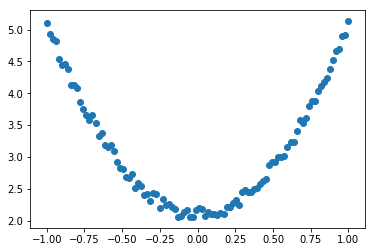

In [15]:
#显示数据集
plt.scatter(x,y)
plt.show()

In [18]:
#初始化权重参数,随机数
w = np.random.rand(1,1)
b = np.random.rand(1,1)

In [20]:
#前向传播，定义损失函数，反向传播（链式求导），梯度下降
for i in range(1000):
    #这里x的平方是作为已知的，更加表明了线性回归无法预测非线性部分，即能力有限，不知后面的神经网络可以否？？？？？
    y_pred = w * np.power(x,2) + b
    #这个损失函数采用的是均方差？名字不知道啊？而且怎么保证是全局最优而非局部最优？即是凸函数？
    loss = 0.5*(y_pred - y) ** 2
    #上面的损失函数是一个矩阵，要求和成标量
    loss = loss.sum()
    #求梯度，要明确梯度是loss关于自变量的梯度，而且numpy不能自动求导，只能根据loss公式手推导数公式
    grad_w = np.sum((y_pred - y) * np.power(x,2))
    grad_b = np.sum(y_pred - y)
    #梯度下降,千万记得乘以学习率lr
    lr = 0.001
    w -= lr*grad_w
    b -= lr*grad_b
    #每一百次迭代输出一次loss
    if i%100 == 0:
        print(loss,w,b)

0.16699080455932083 [[2.98877153]] [[2.09837004]]
0.16696544172208352 [[2.99021576]] [[2.09783496]]
0.16696056873506326 [[2.99084881]] [[2.09760041]]
0.1669596324832443 [[2.99112629]] [[2.09749761]]
0.16695945260025588 [[2.99124792]] [[2.09745254]]
0.16695941803915892 [[2.99130123]] [[2.09743279]]
0.1669594113989014 [[2.9913246]] [[2.09742413]]
0.1669594101231021 [[2.99133484]] [[2.09742034]]
0.16695940987798152 [[2.99133933]] [[2.09741868]]
0.16695940983088606 [[2.9913413]] [[2.09741795]]


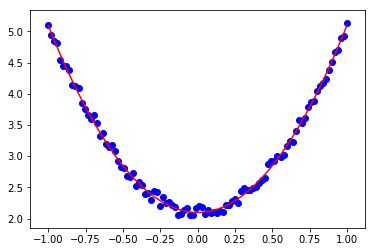

In [25]:
#可视化拟合曲线与实际散点比较
#表示绘plot图用红色实线
plt.plot(x,y_pred,'r-')
plt.scatter(x,y,color = 'blue',marker = 'o')